In [1]:
import Downloads

In [2]:
Downloads.download("http://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip", "covid19.zip")

"covid19.zip"

In [1]:
using DataFrames, Parquet, CSV, ZipFile, Chain, StatsPlots

In [2]:
path = "covid19.zip";
z = ZipFile.Reader(path);

In [3]:
df = read(z.files[1]) |> x -> CSV.File(x, drop=[:FECHA_ACTUALIZACION]) |> DataFrame;

In [4]:
@chain df begin
    groupby(:ENTIDAD_UM)
    combine(nrow => :num_casos)
end

,ENTIDAD_UM,num_casos
,Int64,Int64
1,1,126797
2,2,202562
3,3,155708
4,4,71936
5,5,254606
6,6,71762
7,7,122345
8,8,142214
9,9,4165939


In [5]:
filter(:ENTIDAD_UM => x -> x == 9, df)

,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES
,String7,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,z482b8,2,12,9,2,9,9,12
2,z24953,1,12,9,1,9,9,10
3,zz8e77,2,12,9,2,9,9,2
4,z2d0c4,1,12,9,1,9,9,6
5,z26b82,2,12,9,1,9,9,7
6,z1b985,1,12,9,1,9,9,13
7,z54974,2,12,9,2,9,9,12
8,z3dc7b,1,12,9,2,9,9,11
9,z2770b,1,12,9,1,9,9,6


In [15]:
gr(size=(1000,300))

Plots.GRBackend()

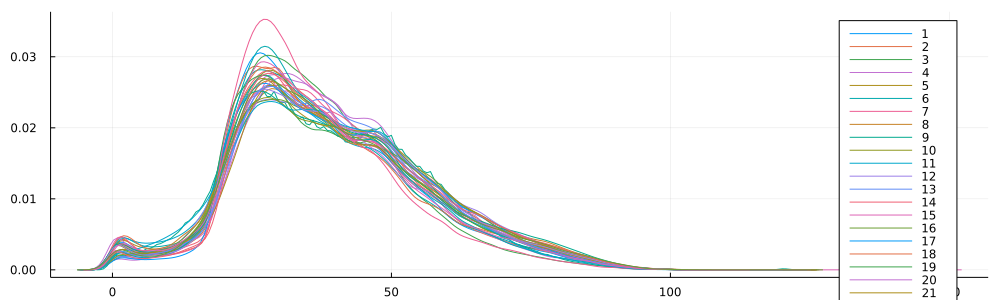

In [16]:
@df df density(:EDAD, group=:ENTIDAD_UM)

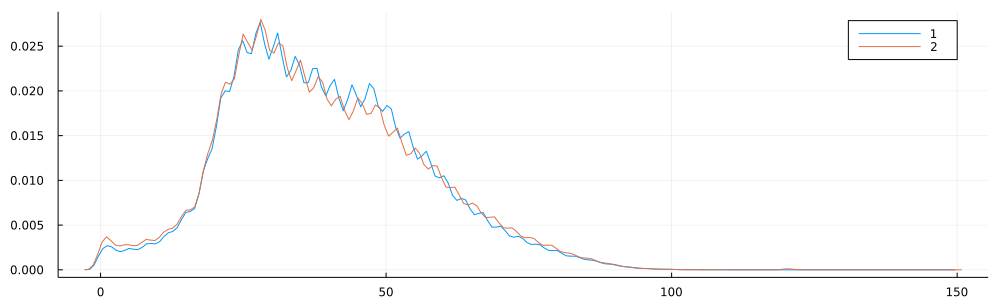

In [17]:
@df df density(:EDAD, group=:SEXO)

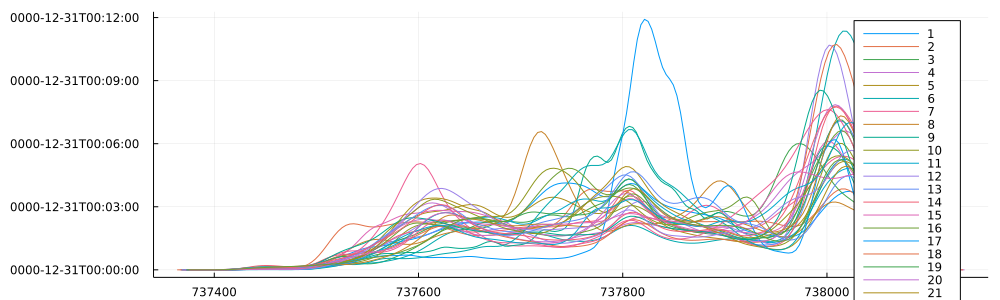

In [18]:
@df df density(:FECHA_INGRESO, group=:ENTIDAD_UM)

In [19]:
df_cdmx = filter(:ENTIDAD_UM => x -> x == 9, df);

In [20]:
casos_pos = @chain df_cdmx begin
    groupby(:FECHA_INGRESO)
    filter(row -> row.CLASIFICACION_FINAL ∈ [1,2,3], _)
    combine(nrow => :NUM_CASOS)
    sort(:FECHA_INGRESO)
end;

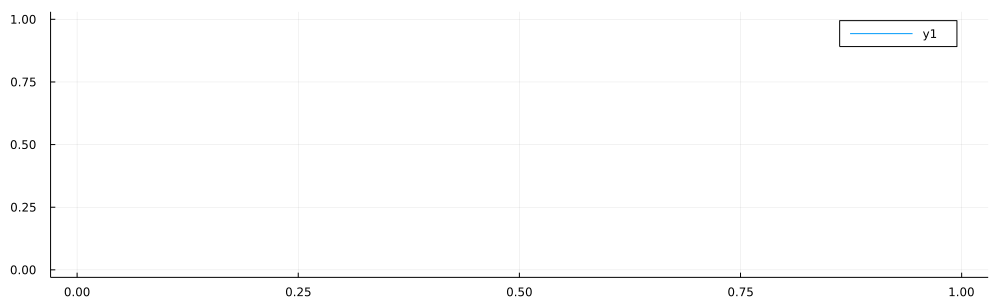

In [21]:
plot(casos_pos.FECHA_INGRESO, casos_pos.NUM_CASOS)

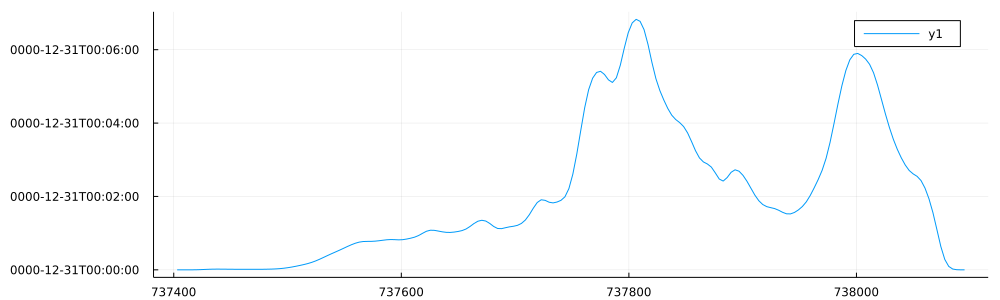

In [22]:
@df df_cdmx density(:FECHA_INGRESO)